In [ ]:
import pandas as pd
import warnings
t=pd.read_csv("/content/framingham.csv")
print(t)
t1=t.describe()
print(t1)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [ ]:
dt=t.dtypes
shape=t.shape
print("t types of each column:\n",dt)
print("Shape:",shape)

t types of each column:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
Shape: (4238, 16)


In [ ]:
nullvalues=t.isnull()
print(nullvalues)
t_mean=t.fillna(0)
print(t_mean)

       male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4233  False  False      False          False       False   False   
4234  False  False      False          False       False   False   
4235  False  False      False          False       False    True   
4236  False  False      False          False       False   False   
4237  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False    

In [ ]:
X = t.drop(columns=["TenYearCHD"])
y = t["TenYearCHD"]

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  

Target (y):
 0    0
1    0
2    0
3    1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (3390, 15)
Test set shape: (848, 15)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t_scaled = pd.DataFrame(scaler.fit_transform(t), columns=t.columns)
print(t_scaled)

      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0      1.0  0.184211   1.000000            0.0    0.000000     0.0   
1      0.0  0.368421   0.333333            0.0    0.000000     0.0   
2      1.0  0.421053   0.000000            1.0    0.285714     0.0   
3      0.0  0.763158   0.666667            1.0    0.428571     0.0   
4      0.0  0.368421   0.666667            1.0    0.328571     0.0   
...    ...       ...        ...            ...         ...     ...   
4233   1.0  0.473684   0.000000            1.0    0.014286     0.0   
4234   1.0  0.500000   0.666667            1.0    0.614286     0.0   
4235   0.0  0.421053   0.333333            1.0    0.285714     NaN   
4236   0.0  0.315789   0.000000            1.0    0.214286     0.0   
4237   0.0  0.526316   0.333333            0.0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.0           0.0       0.0  0.149406  0.106383  0.232804   
1

Logistic Regression Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall: 0.725
F1-score: 0.7073170731707318
Confusion Matrix:
[[36 13]
 [11 29]]


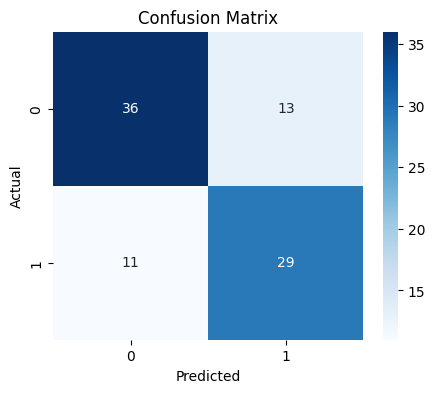

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Accuracy: 0.6966292134831461
Precision: 0.6666666666666666
Recall: 0.65
F1-score: 0.6582278481012659
Confusion Matrix:
[[36 13]
 [14 26]]


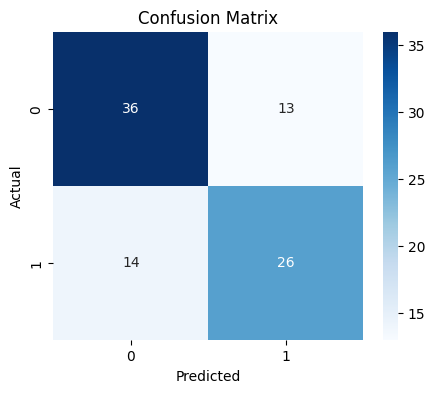

In [ ]:
fromodel.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
m sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN Accuracy: 0.6966292134831461
Confusion Matrix:
[[34 15]
 [12 28]]
Precision: 0.6511627906976745
Recall: 0.7
F1-score: 0.674698795180723
Confusion Matrix:
[[34 15]
 [12 28]]


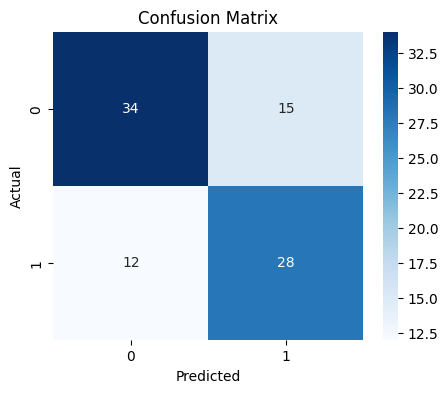

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.7303370786516854
Precision: 0.6818181818181818
Recall: 0.75
F1-score: 0.7142857142857143
Confusion Matrix:
[[35 14]
 [10 30]]


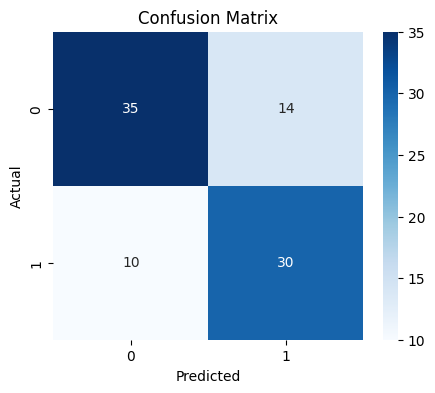

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Results:
Accuracy: 0.7415730337078652
Precision: 0.6976744186046512
Recall: 0.75
F1 Score: 0.7228915662650603
Confusion Matrix:
[[36 13]
 [10 30]]


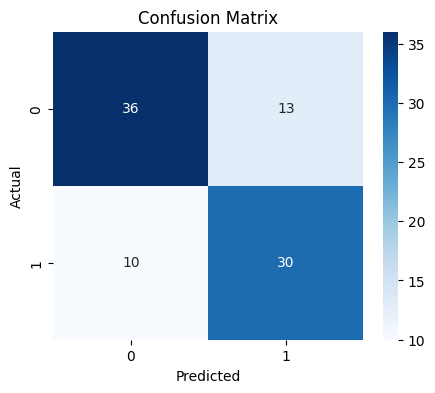

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AdaBoost Results:
Accuracy: 0.7078651685393258
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666667
Confusion Matrix:
[[37 12]
 [14 26]]


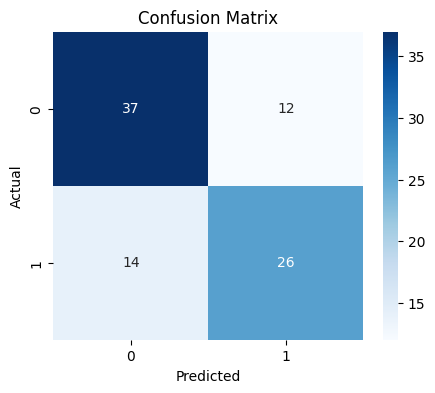

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_abc)
precision = precision_score(y_test, y_pred_abc)
recall = recall_score(y_test, y_pred_abc)
f1 = f1_score(y_test, y_pred_abc)
conf_matrix = confusion_matrix(y_test, y_pred_abc)
print("AdaBoost :")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

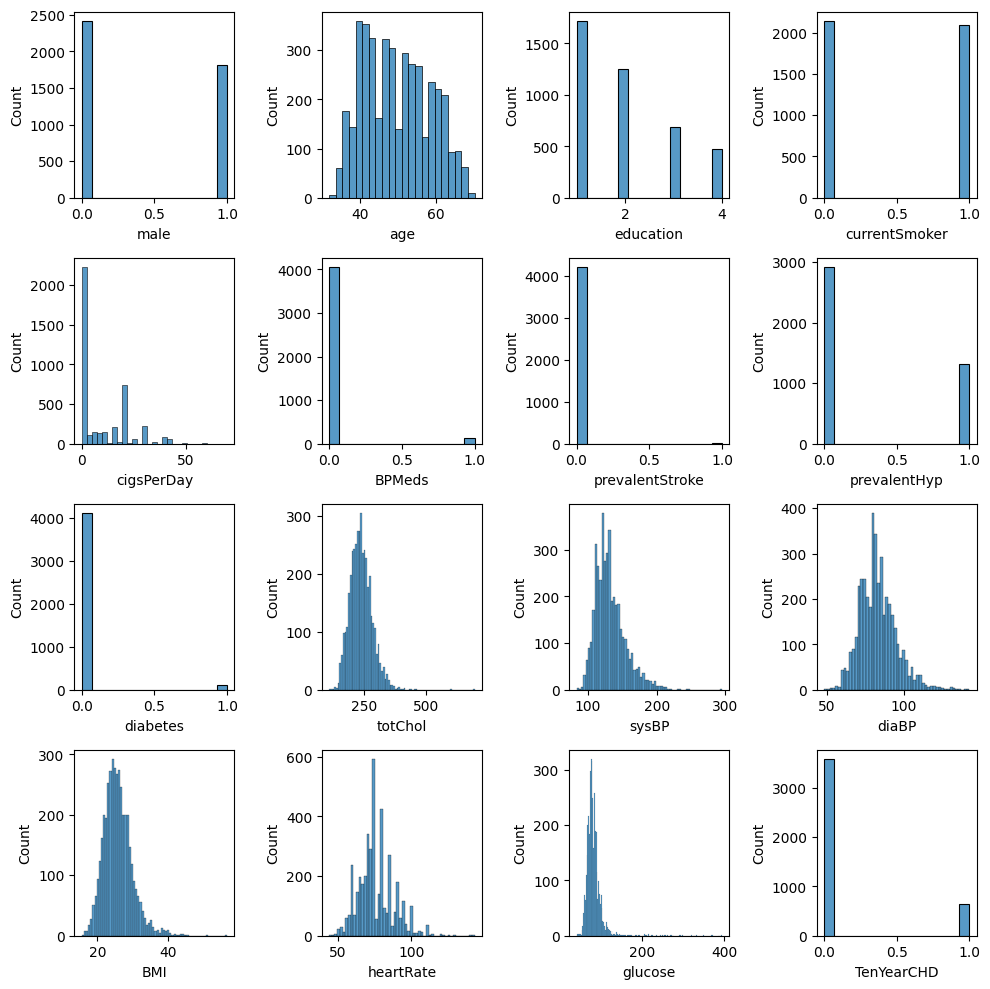

In [ ]:
plt.figure(figsize=(10,10))

plotnumber=1
for column in data:
    plt.subplot(4,4,plotnumber)
    sns.histplot(x=data[column])
    plotnumber+=1
plt.tight_layout()
data = pd.read_csv("/content/framingham.csv")

<Axes: xlabel='cigsPerDay', ylabel='Count'>

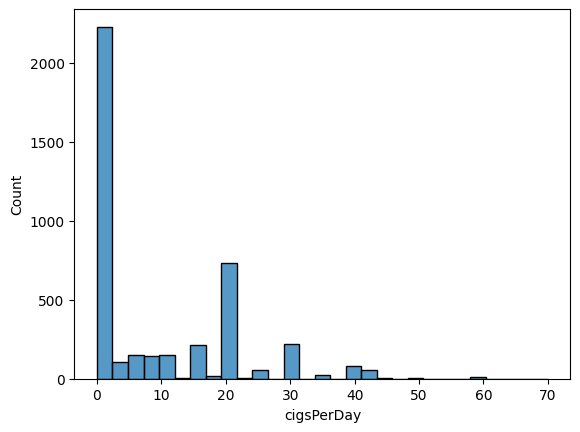

In [ ]:

sns.histplot(data['cigsPerDay'])